In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'content.txt',
 'final.csv',
 'Sample-Copy1.ipynb',
 'Sample-Copy2.ipynb',
 'Sample.ipynb',
 'sampleSub.csv',
 'target.csv',
 'target_final.csv',
 'testHeart.csv',
 'train.csv',
 'Untitled.ipynb']

In [3]:
train_csv = pd.read_csv(r"train.csv",delimiter = ",")  # TRAIN
test_csv  = pd.read_csv(r"testHeart.csv",delimiter = ",") #TEST
train_csv.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3,145.0,233.0,1.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,NaN,1.0,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41.0,0.0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56.0,1.0,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57.0,0.0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,NaN,2.0,1


In [4]:
train_csv.tail() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
236,57.0,0.0,0,140.0,241.0,0.0,1,123.0,1.0,0.2,1,0.0,3.0,0
237,45.0,1.0,3,110.0,264.0,0.0,1,132.0,0.0,1.2,1,0.0,3.0,0
238,68.0,1.0,0,144.0,193.0,1.0,1,141.0,0.0,3.4,1,2.0,3.0,0
239,57.0,1.0,0,130.0,131.0,0.0,1,115.0,1.0,1.2,1,1.0,3.0,0
240,57.0,0.0,1,130.0,236.0,0.0,0,174.0,0.0,0.0,1,1.0,2.0,0


In [5]:
test_csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,0,2,160,360,0,0,151,0,0.8,2,0,2
1,70,1,0,145,174,0,1,125,1,2.6,0,0,3
2,44,0,2,108,141,0,1,175,0,0.6,1,0,2
3,43,0,0,132,341,1,0,136,1,3.0,1,0,3
4,60,0,0,150,258,0,0,157,0,2.6,1,2,3


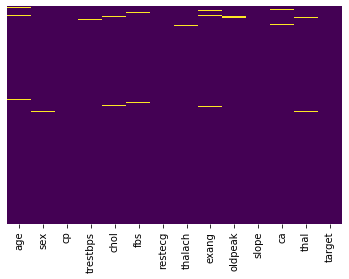

In [6]:
sns.heatmap(train_csv.isnull(), yticklabels=False, cbar=False, cmap='viridis')

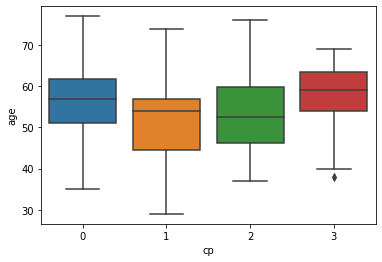

In [7]:
sns.boxplot(x='cp', y='age', data=train_csv)

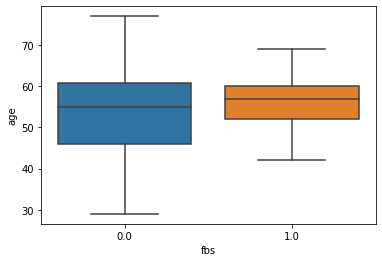

In [8]:
sns.boxplot(x='fbs', y='age', data=train_csv)

In [9]:
train_csv['age'].mean

<bound method Series.mean of 0      63.0
1       NaN
2      41.0
3      56.0
4      57.0
5      57.0
6      56.0
7      44.0
8      52.0
9      57.0
10      NaN
11     48.0
12     49.0
13     64.0
14     58.0
15     50.0
16     58.0
17     66.0
18     43.0
19     69.0
20     59.0
21     44.0
22     42.0
23     61.0
24     40.0
25     71.0
26     59.0
27     51.0
28     65.0
29     53.0
       ... 
211    58.0
212    47.0
213    52.0
214    58.0
215    57.0
216    58.0
217    61.0
218    42.0
219    52.0
220    59.0
221    40.0
222    61.0
223    46.0
224    59.0
225    57.0
226    57.0
227    55.0
228    61.0
229    58.0
230    58.0
231    67.0
232    44.0
233    63.0
234    63.0
235    59.0
236    57.0
237    45.0
238    68.0
239    57.0
240    57.0
Name: age, Length: 241, dtype: float64>

In [10]:
def impute_age(cols):
    age=cols[0]
    if pd.isnull(age):
        return '63'
    else:
        return age

In [11]:
train_csv['age']=train_csv[['age']].apply(impute_age,axis=1)

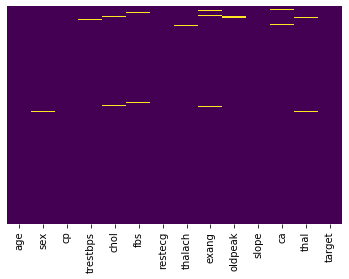

In [12]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train_csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233.0,1.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,63,1.0,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0.0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1.0,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0.0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,NaN,2.0,1


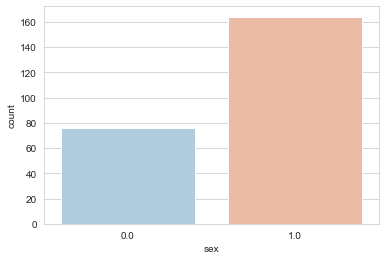

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=train_csv,palette='RdBu_r')

In [15]:
def impute_sex(cols):
    sex=cols[0]
    if sex=='1.0':
        return '1'
    else:
        return sex

In [16]:
train_csv['sex']=train_csv[['sex']].apply(impute_sex,axis=1)

In [17]:
train_csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233.0,1.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,63,1.0,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0.0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1.0,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0.0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,NaN,2.0,1


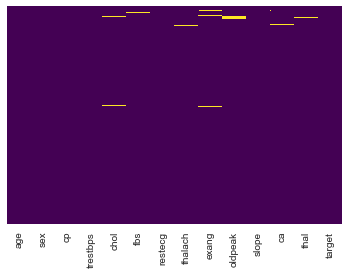

In [18]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train_csv.head(200)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233.0,1.0,0,150.0,0.0,2.3,0,0.0,1.0,1
1,63,1.0,2,130.0,250.0,0.0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0.0,1,130.0,204.0,0.0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1.0,1,120.0,236.0,0.0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0.0,0,120.0,354.0,0.0,1,163.0,1.0,0.6,2,NaN,2.0,1
5,57,1.0,0,140.0,192.0,0.0,1,148.0,NaN,0.4,1,0.0,1.0,1
6,56,0.0,1,140.0,294.0,0.0,0,153.0,0.0,1.3,1,0.0,2.0,1
7,44,1.0,1,120.0,263.0,NaN,1,173.0,0.0,0.0,2,0.0,3.0,1
8,52,1.0,2,172.0,199.0,1.0,1,162.0,0.0,0.5,2,0.0,3.0,1
9,57,1.0,2,150.0,168.0,0.0,1,174.0,0.0,1.6,2,0.0,2.0,1


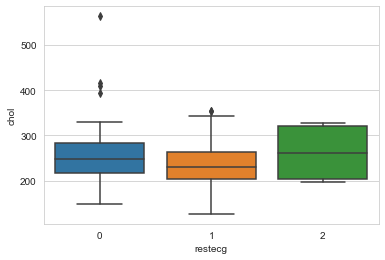

In [20]:
sns.boxplot(x='restecg', y='chol', data=train_csv)

In [21]:
def impute_chol(cols):
    chol=cols[0]
    restecg=cols[1]

    if pd.isnull(chol):
        if restecg== 0:
             return '250.0'
        elif  restecg== 1:
            return '220.0'
        elif restecg== 2:
            return '260.0'
    else:
        return chol
            
        
        

In [22]:
train_csv['chol']=train_csv[['chol', 'restecg']].apply(impute_chol,axis=1)

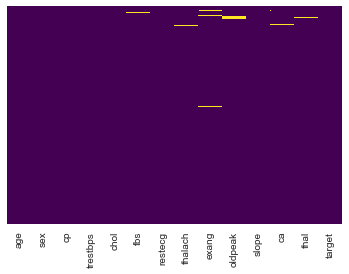

In [23]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

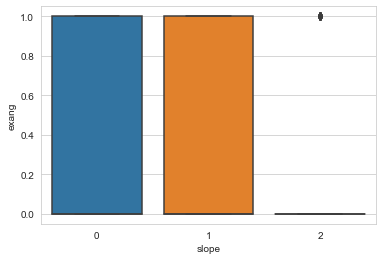

In [24]:
sns.boxplot(x='slope', y='exang', data=train_csv)

In [25]:
train_csv= train_csv.astype({"slope": int})

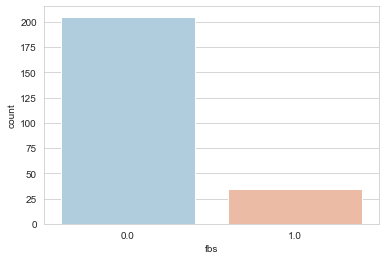

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='fbs',data=train_csv,palette='RdBu_r')

In [27]:
def impute_fbs(cols):
    fbs=cols[0]
    if pd.isnull(fbs):
        return '0'
    else:
        return fbs

In [28]:
train_csv['fbs']=train_csv[['fbs']].apply(impute_fbs,axis=1)

In [29]:
train_csv.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233,1,0,150.0,0.0,2.3,0,0.0,1.0,1
1,63,1.0,2,130.0,250,0,1,187.0,0.0,3.5,0,0.0,2.0,1
2,41,0.0,1,130.0,204,0,0,172.0,0.0,1.4,2,0.0,2.0,1
3,56,1.0,1,120.0,236,0,1,178.0,0.0,0.8,2,0.0,2.0,1
4,57,0.0,0,120.0,354,0,1,163.0,1.0,0.6,2,NaN,2.0,1
5,57,1.0,0,140.0,192,0,1,148.0,NaN,0.4,1,0.0,1.0,1
6,56,0.0,1,140.0,294,0,0,153.0,0.0,1.3,1,0.0,2.0,1
7,44,1.0,1,120.0,263,0,1,173.0,0.0,0.0,2,0.0,3.0,1
8,52,1.0,2,172.0,199,1,1,162.0,0.0,0.5,2,0.0,3.0,1
9,57,1.0,2,150.0,168,0,1,174.0,0.0,1.6,2,0.0,2.0,1


In [30]:
train_csv= train_csv.astype({"fbs": float})

In [31]:
train_csv['thalach'].mean()

149.65

In [32]:
def impute_thalach(cols):
    thalach=cols[0]
    if pd.isnull(thalach):
        return '149.65'
    else:
        return float(thalach)

In [33]:
train_csv['thalach']=train_csv[['thalach']].apply(impute_thalach,axis=1)

In [34]:
train_csv.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233,1.0,0,150,0.0,2.3,0,0.0,1.0,1
1,63,1.0,2,130.0,250,0.0,1,187,0.0,3.5,0,0.0,2.0,1
2,41,0.0,1,130.0,204,0.0,0,172,0.0,1.4,2,0.0,2.0,1
3,56,1.0,1,120.0,236,0.0,1,178,0.0,0.8,2,0.0,2.0,1
4,57,0.0,0,120.0,354,0.0,1,163,1.0,0.6,2,NaN,2.0,1
5,57,1.0,0,140.0,192,0.0,1,148,NaN,0.4,1,0.0,1.0,1
6,56,0.0,1,140.0,294,0.0,0,153,0.0,1.3,1,0.0,2.0,1
7,44,1.0,1,120.0,263,0.0,1,173,0.0,0.0,2,0.0,3.0,1
8,52,1.0,2,172.0,199,1.0,1,162,0.0,0.5,2,0.0,3.0,1
9,57,1.0,2,150.0,168,0.0,1,174,0.0,1.6,2,0.0,2.0,1


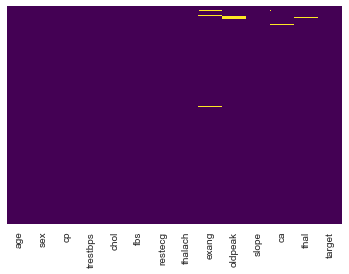

In [35]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

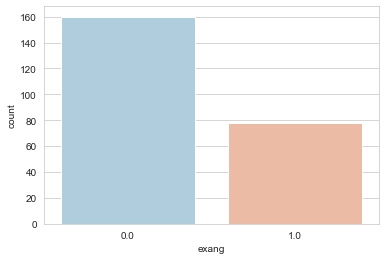

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='exang',data=train_csv,palette='RdBu_r')



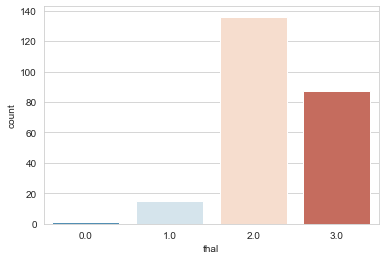

In [37]:

sns.set_style('whitegrid')
sns.countplot(x='thal',data=train_csv,palette='RdBu_r')

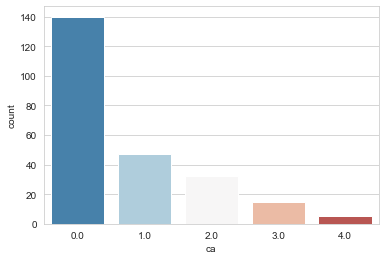

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='ca',data=train_csv,palette='RdBu_r')

In [39]:
def impute_exang(cols):
    exang=cols[0]
    if pd.isnull(exang):
        return '0'
    else:
        return float(exang)

In [40]:
train_csv['exang']=train_csv[['exang']].apply(impute_exang,axis=1)

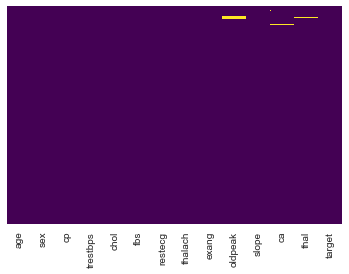

In [41]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
def impute_ca(cols):
    ca=cols[0]
    if pd.isnull(ca):
        return '0.0'
    else:
        return float(ca)

In [43]:
train_csv['ca']=train_csv[['ca']].apply(impute_ca,axis=1)

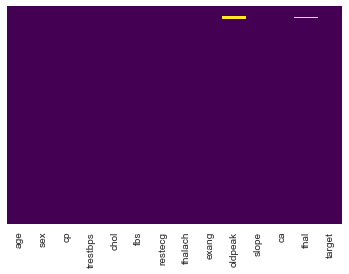

In [44]:
sns.heatmap(train_csv.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
def impute_thal(cols):
    thal=cols[0]
    if pd.isnull(thal):
        return '2.0'
    else:
        return float(thal)

In [46]:
train_csv['thal']=train_csv[['thal']].apply(impute_thal,axis=1)

In [47]:
a=train_csv['oldpeak'].mean()

In [48]:
print(round(a,2))

1.0


In [49]:
def impute_oldpeak(cols):
    oldpeak=cols[0]
    if pd.isnull(oldpeak):
        return float('1')
    else:
        return float(oldpeak)

In [50]:
train_csv['oldpeak']=train_csv[['oldpeak']].apply(impute_oldpeak,axis=1)

In [51]:
train_csv.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233,1.0,0,150,0,2.3,0,0,1,1
1,63,1.0,2,130.0,250,0.0,1,187,0,3.5,0,0,2,1
2,41,0.0,1,130.0,204,0.0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120.0,236,0.0,1,178,0,0.8,2,0,2,1
4,57,0.0,0,120.0,354,0.0,1,163,1,0.6,2,0.0,2,1
5,57,1.0,0,140.0,192,0.0,1,148,0,0.4,1,0,1,1
6,56,0.0,1,140.0,294,0.0,0,153,0,1.3,1,0,2,1
7,44,1.0,1,120.0,263,0.0,1,173,0,0.0,2,0,3,1
8,52,1.0,2,172.0,199,1.0,1,162,0,0.5,2,0,3,1
9,57,1.0,2,150.0,168,0.0,1,174,0,1.6,2,0,2,1


In [52]:
train_csv.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233,1.0,0,150,0,2.3,0,0,1,1
1,63,1.0,2,130.0,250,0.0,1,187,0,3.5,0,0,2,1
2,41,0.0,1,130.0,204,0.0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120.0,236,0.0,1,178,0,0.8,2,0,2,1
4,57,0.0,0,120.0,354,0.0,1,163,1,0.6,2,0.0,2,1
5,57,1.0,0,140.0,192,0.0,1,148,0,0.4,1,0,1,1
6,56,0.0,1,140.0,294,0.0,0,153,0,1.3,1,0,2,1
7,44,1.0,1,120.0,263,0.0,1,173,0,0.0,2,0,3,1
8,52,1.0,2,172.0,199,1.0,1,162,0,0.5,2,0,3,1
9,57,1.0,2,150.0,168,0.0,1,174,0,1.6,2,0,2,1


In [53]:
b=train_csv['trestbps'].mean()

In [54]:
print(round(b,2))

131.63


In [55]:
def impute_trestbps(cols):
    trestbps=cols[0]
    if pd.isnull(trestbps):
        return '131'
    else:
        return trestbps

In [56]:
train_csv['trestbps']=train_csv[['trestbps']].apply(impute_trestbps,axis=1)

In [57]:
 train_csv.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233,1.0,0,150,0,2.3,0,0,1,1
1,63,1.0,2,130,250,0.0,1,187,0,3.5,0,0,2,1
2,41,0.0,1,130,204,0.0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120,236,0.0,1,178,0,0.8,2,0,2,1
4,57,0.0,0,120,354,0.0,1,163,1,0.6,2,0.0,2,1
5,57,1.0,0,140,192,0.0,1,148,0,0.4,1,0,1,1
6,56,0.0,1,140,294,0.0,0,153,0,1.3,1,0,2,1
7,44,1.0,1,120,263,0.0,1,173,0,0.0,2,0,3,1
8,52,1.0,2,172,199,1.0,1,162,0,0.5,2,0,3,1
9,57,1.0,2,150,168,0.0,1,174,0,1.6,2,0,2,1


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train= train_csv.drop(['target'],axis=1)
y_train= train_csv['target']

In [60]:
x_test = test_csv

In [64]:
train_csv= train_csv.astype({"thal": int})

In [65]:
def impute_chol(cols):
    chol=cols[0]
    if chol=='220.0':
        return '220'
    else:
        return chol

In [66]:
train_csv['chol']=train_csv[['chol']].apply(impute_chol,axis=1)

In [67]:
def impute_thal(cols):
    thal=cols[0]
    if (thal):
        return float(thal)
    else:
        return thal

In [68]:
train_csv['thal']=train_csv[['thal']].apply(impute_thal,axis=1)

In [69]:
def impute_ca(cols):
    ca=cols[0]
    if (ca):
        return float(ca)
    else:
        return ca

In [70]:
train_csv['ca']=train_csv[['ca']].apply(impute_ca,axis=1)

In [71]:
train_csv= train_csv.astype({"ca": int})

In [72]:
train_csv= train_csv.astype({"fbs": int})

In [73]:
def impute_sex(cols):
    sex=cols[0]
    if pd.isnull(sex):
        return 1
    else:
        return int(sex)

In [74]:
train_csv['sex']=train_csv[['sex']].apply(impute_sex,axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x= train_csv.drop(['target'],axis=1)
y= train_csv['target']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.metrics import classification_report

In [ ]:
output = gausian.predict(test_csv)

In [85]:
output2 = pd.DataFrame({'target': output})

NameError: name 'output' is not defined

In [ ]:
output2.to_csv('target_final1.csv', index=False)

In [80]:
from sklearn.naive_bayes import GaussianNB
gausian = GaussianNB()


In [81]:
gausian.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
predictgau = gausian.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score


In [84]:
accuracy_score(y_test, predictgau)

0.9183673469387755